# The Impact of Litigations on GHG Emissions
* "litigation" from [Graham Institute](https://climate-laws.org/legislation_and_policies), takes the value of 1 when the first case related to environmental laws was solved in a given year, independently of the result
* "rule of law" from World Bank
* Sample excludes the US, and includes all countries for which there has been at least a case with a resolution: 23 countries, mostly HI and MI countries

In [1]:
%set graph_format svg --permanently

Install Stata packages

In [2]:
ssc inst xtivreg2
ssc install ivreg2
ssc install ranktest
ssc inst medsem


checking xtivreg2 consistency and verifying not already installed...
all files already exist and are up to date.

checking ivreg2 consistency and verifying not already installed...
all files already exist and are up to date.

checking ranktest consistency and verifying not already installed...
all files already exist and are up to date.

checking medsem consistency and verifying not already installed...
all files already exist and are up to date.


Read data

In [3]:
insheet using "litigation.csv", comma clear

(8 vars, 928 obs)


Define Country_ID as numerical

In [4]:
egen id = group(country)
xtset id year




Panel variable: id (strongly balanced)
 Time variable: year, 1990 to 2018
         Delta: 1 unit


Creation of log values

In [5]:
gen lnghg = ln(ghg)
gen lngdp = ln(gdp)
gen lngdp2 = lngdp^2
gen lnpopulation = ln(population)
gen lnlaw = ln(ruleoflaw)



(23 missing values generated)

(23 missing values generated)


(288 missing values generated)


Define High-Income and Middle-Income countries

In [6]:
local high_income_countries "BEL AUS CAN CHE DEU ESP EST FIN FRA GBR GRC HRV ITA LTU LUX NLD NOR NZL POL PRT SVK SWE ROU"
gen HI=0
foreach country of local high_income_countries {
    quietly replace HI = 1 if country == "`country'"
}

In [7]:
local middle_income_countries "BGR CRI FJI IND KEN PAK NPL PHL UKR"
gen MI=0
foreach country of local middle_income_countries {
    quietly replace MI = 1 if country == "`country'"
}

### Figure 3. GHG Evolution of Emissions over Time. Whole Sample

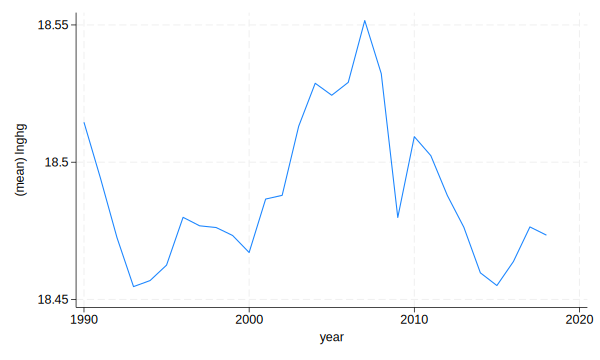

In [8]:
preserve
collapse (mean) lnghg, by (year)
graph twoway line lnghg year
restore

### Figure 4. GHG Evolution of Emissions over Time. High-Income Countries



(261 observations deleted)


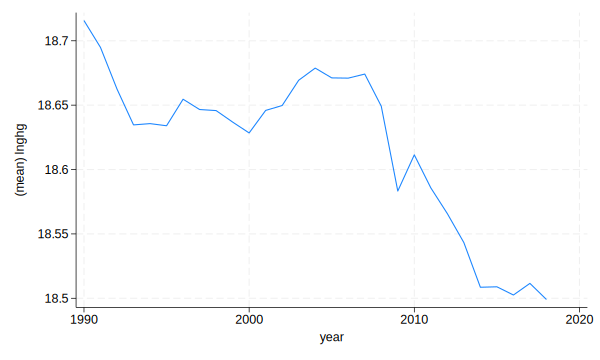

In [9]:
preserve
keep if HI==1
collapse (mean) lnghg, by (year)
graph twoway line lnghg year
restore

###  Figure 5. GHG Evolution of Emissions over Time. Middle-Income Countries



(667 observations deleted)


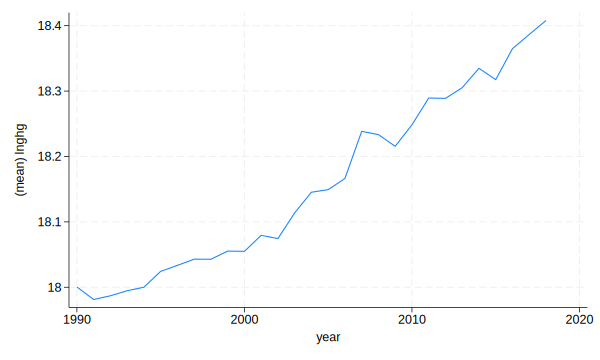

In [10]:
preserve
keep if MI==1
collapse (mean) lnghg, by (year)
graph twoway line lnghg year
restore

### Table 2. Summary statistics

Panel A: Whole sample

In [11]:
sum ghg gdp pop ruleoflaw


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         ghg |        928    2.75e+08    4.26e+08    1820000   3.37e+09
         gdp |        905    30906.54    22024.28   1616.649   120647.8
  population |        928    6.25e+07    1.95e+08     381850   1.35e+09
   ruleoflaw |        640    71.81731    25.38809   14.35644        100


Panel B: High-income countries

In [12]:
sum ghg gdp pop ruleoflaw if HI==1


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         ghg |        667    2.45e+08    2.65e+08    8480000   1.16e+09
         gdp |        644    40092.67     19063.9    10483.9   120647.8
  population |        667    2.23e+07    2.33e+07     381850   8.29e+07
   ruleoflaw |        460    84.28275    15.53785   14.35644        100


Panel C: Middle-income countries

In [13]:
sum ghg gdp pop ruleoflaw if MI==1


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         ghg |        261    3.51e+08    6.78e+08    1820000   3.37e+09
         gdp |        261    8240.378    7937.578   1616.649    76323.3
  population |        261    1.65e+08    3.46e+08     728575   1.35e+09
   ruleoflaw |        180    39.96117    16.18883   14.35644         74


#### Summaries of log variables

Panel A: Whole sample

In [14]:
sum lnghg lngdp lngdp2 lnpop lnlaw litigation


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       lnghg |        928    18.48851     1.49546   14.41435   21.93966
       lngdp |        905    9.986052    .9750395   7.388111   11.70063
      lngdp2 |        905    100.6709     18.6502   54.58419   136.9048
lnpopulation |        928    16.52304    1.576204   12.85278   21.02533
       lnlaw |        640    4.183953     .470828   2.664199    4.60517
-------------+---------------------------------------------------------
  litigation |        928    .2176724     .412886          0          1


Panel B: High-income countries

In [15]:
sum lnghg lngdp lngdp2 lnpop lnlaw litigation if HI==1


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       lnghg |        667     18.6179     1.27205   15.95322   20.87187
       lngdp |        644    10.49497    .4640565   9.257596   11.70063
      lngdp2 |        644    110.3594    9.684836   85.70309   136.9048
lnpopulation |        667    16.26146    1.283457   12.85278   18.23322
       lnlaw |        460    4.411902    .2305409   2.664199    4.60517
-------------+---------------------------------------------------------
  litigation |        667    .2593703     .438618          0          1


Panel C: Middle-income countries

In [16]:
sum lnghg lngdp lngdp2 lnpop lnlaw litigation if MI==1


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       lnghg |        261    18.15782    1.917304   14.41435   21.93966
       lngdp |        261    8.730336    .7406391   7.388111   11.24273
      lngdp2 |        261    76.76522    13.08562   54.58419   126.3991
lnpopulation |        261    17.19153    2.003558   13.49885   21.02533
       lnlaw |        180    3.601417    .4246114   2.664199   4.304065
-------------+---------------------------------------------------------
  litigation |        261    .1111111    .3148735          0          1


### Table 3. Estimation Results for the Whole Sample

(1) OLS

In [17]:
reg lnghg lngdp lngdp2 lnpopulation lnlaw litigation, robust


Linear regression                               Number of obs     =        639
                                                F(5, 633)         =    1929.50
                                                Prob > F          =     0.0000
                                                R-squared         =     0.9221
                                                Root MSE          =     .41807

------------------------------------------------------------------------------
             |               Robust
       lnghg | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       lngdp |   2.578943   .3068436     8.40   0.000     1.976388    3.181497
      lngdp2 |  -.0985641   .0162742    -6.06   0.000    -.1305221   -.0666062
lnpopulation |   .9994721   .0113074    88.39   0.000     .9772675    1.021677
       lnlaw |   .0755278   .0674979     1.12   0.264    -.0570191    .2080747
  litigation |

(2) TW-FE

In [18]:
xtreg lnghg lngdp lngdp2 lnpopulation lnlaw litigation i.year, fe robust


Fixed-effects (within) regression               Number of obs     =        639
Group variable: id                              Number of groups  =         32

R-squared:                                      Obs per group:
     Within  = 0.7271                                         min =         19
     Between = 0.8887                                         avg =       20.0
     Overall = 0.8873                                         max =         20

                                                F(24, 31)         =      38.79
corr(u_i, Xb) = -0.8080                         Prob > F          =     0.0000

                                    (Std. err. adjusted for 32 clusters in id)
------------------------------------------------------------------------------
             |               Robust
       lnghg | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       lngdp |   2.457918   

(3) OLS

In [19]:
reg lnghg lngdp lngdp2 lnpopulation lnlaw HI#c.litigation, robust


Linear regression                               Number of obs     =        639
                                                F(6, 632)         =    1642.01
                                                Prob > F          =     0.0000
                                                R-squared         =     0.9225
                                                Root MSE          =     .41737

------------------------------------------------------------------------------
             |               Robust
       lnghg | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       lngdp |   2.515082   .3069351     8.19   0.000     1.912346    3.117818
      lngdp2 |  -.0954019   .0162537    -5.87   0.000    -.1273196   -.0634841
lnpopulation |   .9978254   .0113636    87.81   0.000     .9755103     1.02014
       lnlaw |   .1021409   .0698572     1.46   0.144    -.0350394    .2393211
             |

(4) TW-FE

In [20]:
xtreg lnghg lngdp lngdp2 lnpopulation lnlaw HI#c.litigation i.year, fe robust

> 

Fixed-effects (within) regression               Number of obs     =        639
Group variable: id                              Number of groups  =         32

R-squared:                                      Obs per group:
     Within  = 0.7282                                         min =         19
     Between = 0.8871                                         avg =       20.0
     Overall = 0.8856                                         max =         20

                                                F(25, 31)         =      32.25
corr(u_i, Xb) = -0.8081                         Prob > F          =     0.0000

                                    (Std. err. adjusted for 32 clusters in id)
------------------------------------------------------------------------------
             |               Robust
       lnghg | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       lngdp |   2.326192

### Table 4. Results with interactions and Instrumental Variables

(1) Interaction

In [21]:
xtreg lnghg lngdp lngdp2 lnpop c.lnlaw#i.litigation i.year, fe robust


Fixed-effects (within) regression               Number of obs     =        639
Group variable: id                              Number of groups  =         32

R-squared:                                      Obs per group:
     Within  = 0.7274                                         min =         19
     Between = 0.8883                                         avg =       20.0
     Overall = 0.8869                                         max =         20

                                                F(24, 31)         =      37.74
corr(u_i, Xb) = -0.8097                         Prob > F          =     0.0000

                                    (Std. err. adjusted for 32 clusters in id)
------------------------------------------------------------------------------
             |               Robust
       lnghg | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       lngdp |   2.418571   

(2) UMI

In [22]:
gen UMI=0
quietly replace UMI=1 if gdp<12700

In [23]:
xtreg lnghg lngdp lngdp2 lnpop lnlaw UMI#c.litigation i.year, fe  robust


Fixed-effects (within) regression               Number of obs     =        639
Group variable: id                              Number of groups  =         32

R-squared:                                      Obs per group:
     Within  = 0.7272                                         min =         19
     Between = 0.8888                                         avg =       20.0
     Overall = 0.8874                                         max =         20

                                                F(25, 31)         =      40.23
corr(u_i, Xb) = -0.8090                         Prob > F          =     0.0000

                                    (Std. err. adjusted for 32 clusters in id)
------------------------------------------------------------------------------
             |               Robust
       lnghg | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       lngdp |   2.491482   

(3) IV-GMM

In [24]:
xi:xtivreg2 lnghg lngdp lngdp2 lnpop lnlaw i.year (litigation=l(-2/-1).fillingdate), fe gmm

i.year            _Iyear_1990-2018    (naturally coded; _Iyear_1990 omitted)
Warning - collinearities detected
Vars dropped:       _Iyear_1991 _Iyear_1992 _Iyear_1993 _Iyear_1994 _Iyear_1995
                    _Iyear_1997 _Iyear_1999 _Iyear_2001 _Iyear_2016 _Iyear_2017
                    _Iyear_2018

FIXED EFFECTS ESTIMATION
------------------------
Number of groups =        32                    Obs per group: min =        16
                                                               avg =      17.9
                                                               max =        18
Warning - collinearities detected
Vars dropped:  _Iyear_1991 _Iyear_1992 _Iyear_1993 _Iyear_1994 _Iyear_1995
               _Iyear_1997 _Iyear_1999 _Iyear_2001 _Iyear_2016 _Iyear_2017
               _Iyear_2018

2-Step GMM estimation
---------------------

Estimates efficient for homoskedasticity only
Statistics consistent for homoskedasticity only

                                                      Num

### Table 5. Results without EIT, for EU Countries and by Type of Litigation Decision

(1) EIT-FE

In [25]:
gen EIT=1
local non_EIT_countries "BGR HRV EST LTU POL ROU SVK"
foreach country of local non_EIT_countries {
    quietly replace EIT = 0 if country == "`country'"
}

In [26]:
xtreg lnghg lngdp lngdp2 lnpop lnlaw litigation i.year if EIT==1,fe robust


Fixed-effects (within) regression               Number of obs     =        499
Group variable: id                              Number of groups  =         25

R-squared:                                      Obs per group:
     Within  = 0.7706                                         min =         19
     Between = 0.8710                                         avg =       20.0
     Overall = 0.8699                                         max =         20

                                                F(24, 24)         =    1454.17
corr(u_i, Xb) = -0.8295                         Prob > F          =     0.0000

                                    (Std. err. adjusted for 25 clusters in id)
------------------------------------------------------------------------------
             |               Robust
       lnghg | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       lngdp |   2.454993   

(2) EU-FE

In [27]:
gen EU=1
local non_EU_countries "CAN CRI FJI IND KEN NZL PAK PHL AUS NPL"
foreach country of local non_EU_countries {
    quietly replace EU = 0 if country == "`country'"
}

In [28]:
xtreg lnghg lngdp lngdp2 lnpop lnlaw litigation i.year if EU==1,fe robust


Fixed-effects (within) regression               Number of obs     =        440
Group variable: id                              Number of groups  =         22

R-squared:                                      Obs per group:
     Within  = 0.7050                                         min =         20
     Between = 0.8142                                         avg =       20.0
     Overall = 0.8057                                         max =         20

                                                F(21, 21)         =          .
corr(u_i, Xb) = 0.7442                          Prob > F          =          .

                                    (Std. err. adjusted for 22 clusters in id)
------------------------------------------------------------------------------
             |               Robust
       lnghg | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       lngdp |  -3.258662   

(3) By litigation decision type

In [29]:
gen ncl=0  
local ncl_countries "AUS BEL EST DEU GRC NZL NOR GBR CHE UKR PTR KEN FJI"
foreach country of local ncl_countries {
    quietly replace ncl = 1 if country == "`country'"
}
gen ncllitig=ncl*litigation

In [30]:
xtreg lnghg lngdp lngdp2 lnpop lnlaw litigation ncllitig i.year,fe robust


Fixed-effects (within) regression               Number of obs     =        639
Group variable: id                              Number of groups  =         32

R-squared:                                      Obs per group:
     Within  = 0.7273                                         min =         19
     Between = 0.8895                                         avg =       20.0
     Overall = 0.8880                                         max =         20

                                                F(25, 31)         =      41.28
corr(u_i, Xb) = -0.8100                         Prob > F          =     0.0000

                                    (Std. err. adjusted for 32 clusters in id)
------------------------------------------------------------------------------
             |               Robust
       lnghg | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       lngdp |   2.462322   

(4) Kyoto

In [31]:
gen kyoto=0
quietly replace kyoto=1 if HI==1&year>=2008

In [32]:
xtreg lnghg lngdp lngdp2 lnpop lnlaw litigation  kyoto i.year,fe robust


Fixed-effects (within) regression               Number of obs     =        639
Group variable: id                              Number of groups  =         32

R-squared:                                      Obs per group:
     Within  = 0.7331                                         min =         19
     Between = 0.8829                                         avg =       20.0
     Overall = 0.8815                                         max =         20

                                                F(25, 31)         =      40.11
corr(u_i, Xb) = -0.7839                         Prob > F          =     0.0000

                                    (Std. err. adjusted for 32 clusters in id)
------------------------------------------------------------------------------
             |               Robust
       lnghg | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       lngdp |   2.004499   